### Reminders from the debrief doc
- Turn off notification sounds of computer
- While coding, when people are coding along, try to explain what you are typing while typing it instead of explaining it after finishing the code

## Notes

### Load image and display it

/var/folders/js/v54t24f101585t5fkkx3qpkh0000gn/T/ipykernel_9077/3850526815.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = iio.imread(uri="data/gaussian-original.png")


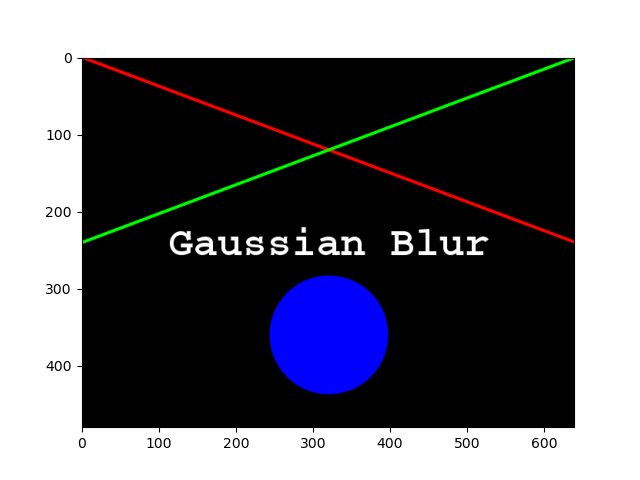

In [1]:
import imageio as iio
import matplotlib.pyplot as plt
import skimage.filters
%matplotlib widget

img = iio.imread(uri="data/gaussian-original.png")

# display the image
fig, ax = plt.subplots()
plt.imshow(img)

In [2]:
# import sys; print(sys.version)
# import platform; print(platform.python_implementation()); print(platform.platform())
# import skimage; print(skimage.__version__)

### Apply the Gaussian blur and display

In [3]:
sigma = 3.0

# apply Gaussian blur, creating a new image
blurred = skimage.filters.gaussian(
    img, sigma=(sigma, sigma), truncate=3.5, channel_axis=2)

The first two parameters to `skimage.filters.gaussian()` are the `image` to blur, image, and a tuple defining the sigma to use in ry- and cx-direction, (`sigma`, `sigma`). The third parameter truncate gives the radius of the kernel in terms of sigmas. A Gaussian function is defined from -infinity to +infinity, but our kernel (which must have a finite, smaller size) can only approximate the real function. Therefore, we must choose a certain distance from the centre of the function where we stop this approximation, and set the final size of our kernel. In the above example, we set `truncate` to 3.5, which means the kernel size will be 2 * sigma * 3.5. For example, for a `sigma` of 1.0 the resulting kernel size would be 7, while for a `sigma` of 2.0 the kernel size would be 14. The default value for `truncate` in scikit-image is 4.0.

The last parameter to `skimage.filters.gaussian()` tells skimage to interpret our image, that has three dimensions, as a multichannel colour image.

Finally, we display the blurred image:

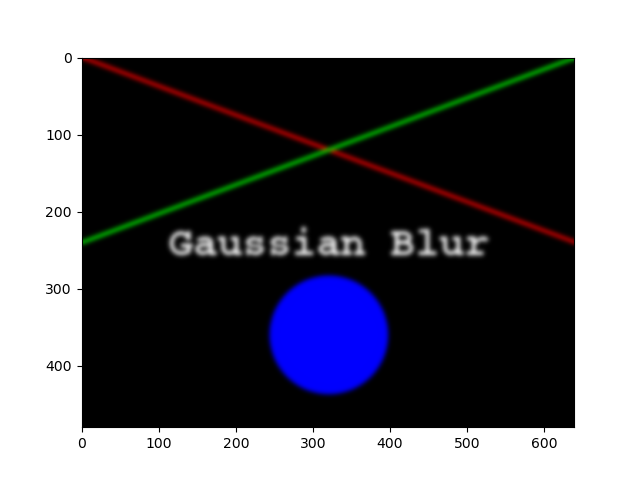

In [4]:
# display blurred image
fig, ax = plt.subplots()
plt.imshow(blurred)

### Exercise: experimenting with sigma values (10 min)

The size and shape of the kernel used to blur an image can have a significant effect on the result of the blurring and any downstream analysis carried out on the blurred image. Try running the code above with a range of smaller and larger sigma values.

#### Generally speaking, what effect does the sigma value have on the blurred image?

_Solution_

Generally speaking, the larger the sigma value, the more blurry the result. A larger sigma will tend to get rid of more noise in the image, which will help for other operations we will cover soon, such as thresholding. However, a larger sigma also tends to eliminate some of the detail from the image. So, we must strike a balance with the sigma value used for blur filters.

### Experimenting with kernel shape (10 min - optional, not included in timing)

Now, what is the effect of applying an asymmetric kernel to blurring an image? Try running the code above with different sigmas in the ry and cx direction. For example, a sigma of 1.0 in the ry direction, and 6.0 in the cx direction.

_Solution_

/var/folders/js/v54t24f101585t5fkkx3qpkh0000gn/T/ipykernel_9077/226684296.py:2: FutureWarning: `multichannel` is a deprecated argument name for `gaussian`. It will be removed in version 1.0. Please use `channel_axis` instead.
  blurred = skimage.filters.gaussian(


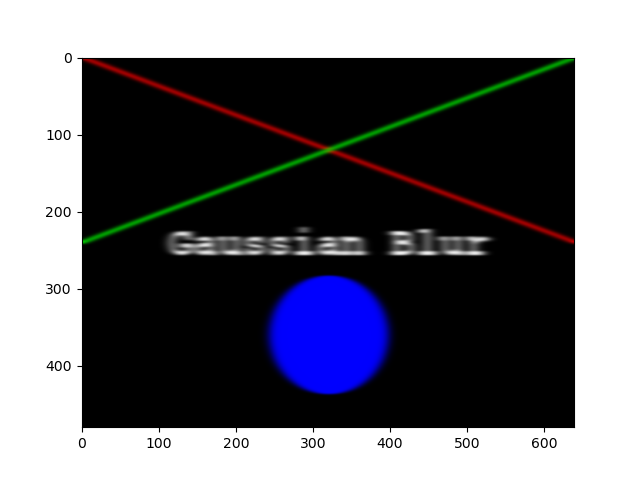

In [5]:
# apply Gaussian blur, with a sigma of 1.0 in the ry direction, and 6.0 in the cx direction
blurred = skimage.filters.gaussian(
    img, sigma=(1.0, 6.0), truncate=3.5, multichannel=True
)

# display blurred image
fig, ax = plt.subplots()
plt.imshow(blurred)

These unequal sigma values produce a kernel that is rectangular instead of square. The result is an image that is much more blurred in the x direction than the y direction. For most use cases, a uniform blurring effect is desirable and this kind of asymmetric blurring should be avoided. However, it can be helpful in specific circumstances e.g. when noise is present in your image in a particular pattern or orientation, such as vertical lines, or when you want to remove uniform noise without blurring edges present in the image in a particular orientation.

### Key Points

- Applying a low-pass blurring filter smooths edges and removes noise from an image.

- Blurring is often used as a first step before we perform thresholding or edge detection.

- The Gaussian blur can be applied to an image with the skimage.filters.gaussian() function.

- Larger sigma values may remove more noise, but they will also remove detail from an image.